In [6]:
import matplotlib.pyplot as plt

from utils import *
import albumentations as A
from albumentations.pytorch import ToTensorV2
import torch
from model import *

# Creating plots on the test set

In [ ]:
train_transform = A.Compose([
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(
        shift_limit=0.3,
        scale_limit=0.5,
        rotate_limit=30,
        border_mode=cv2.BORDER_REFLECT,
        p=0.5
    ),
    A.Affine(shear=5, p=0.5),
    A.Perspective(scale=(0.001, 0.001), p=0.5),
    ToTensorV2()
])

val_transform = A.Compose([
    ToTensorV2()  # This ensures the output is in the format PyTorch expects
])

stenosis_train, stenosis_test, stenosis_val = get_loaders(
    'dataset/stenosis/train', 'dataset/stenosis/test', 'dataset/stenosis/val', 1, train_transform, val_transform, val_transform)

In [ ]:
unet = torch.load("checkpoint/sten_Unet/best.pth",
                  map_location=torch.device('cpu'))
unet.eval()

wide_unet = torch.load("checkpoint/sten_Unet_wide/best.pth",
                       map_location=torch.device('cpu'))

wide_unet.eval()

unet_pp = torch.load("checkpoint/sten_unet++/best.pth",
                     map_location=torch.device('cpu'))
unet_pp.eval()

UNetPlusPlus(
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (up): Upsample(scale_factor=2.0, mode='bilinear')
  (conv_00): VGGBlock(
    (conv): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (conv_10): VGGBlock(
    (conv): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

In [35]:
data = next(iter(stenosis_test))
output_unet = unet(data[0])
output_wide_unet = wide_unet(data[0])
output_unet_pp = unet_pp(data[0])

In [36]:
pred_unet = (torch.sigmoid(output_unet) > 0.5).long()
pred_wide_unet = (torch.sigmoid(output_wide_unet) > 0.5).long()
pred_unet_pp = (torch.sigmoid(output_unet_pp) > 0.5).long()

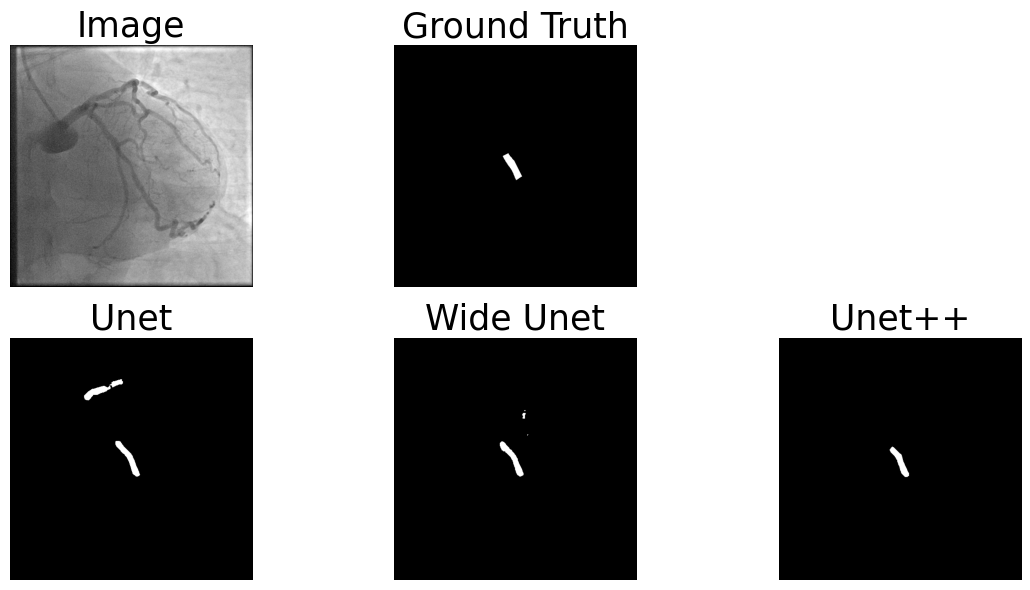

In [ ]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(2, 3, 1)
ax.imshow(data[0][0][0], cmap='gray')
ax.set_title("Image", fontsize=25)
ax.axis('off')
ax = fig.add_subplot(2, 3, 2)
ax.imshow(data[1][0][0], cmap='gray')
ax.set_title("Ground Truth", fontsize=25)
ax.axis('off')
ax = fig.add_subplot(2, 3, 4)
ax.imshow(pred_unet[0][0], cmap='gray')
ax.set_title("Unet", fontsize=25)
ax.axis('off')
ax = fig.add_subplot(2, 3, 5)
ax.imshow(pred_wide_unet[0][0], cmap='gray')
ax.set_title("Wide Unet", fontsize=25)
ax.axis('off')
ax = fig.add_subplot(2, 3, 6)
ax.imshow(pred_unet_pp[0][0], cmap='gray')
ax.set_title("Unet++", fontsize=25)
ax.axis('off')
plt.tight_layout()
plt.show()